### FCN : Fully Convolutional Networks for Semantic Segmentation, CVPR 2015 
*Editor : Junha Park*

### Related Works :  [OverFeat](https://arxiv.org/abs/1312.6229)
- Shift-and-stitch trick yields dense predictions from coarse outputs without interpolation.

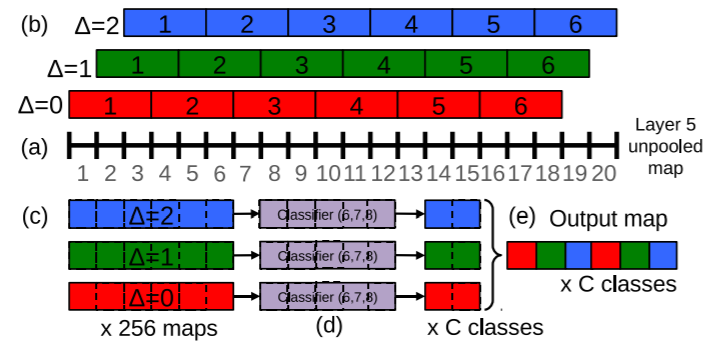</img>

<div align="center">Fig 1. Shift-and-strich trick is sort of smoothing technique, which obtains <br/>output map with perturbations caused by slight offsets.</div>

- What does 'coarse output' mean?
    - Coarse output is generally low in resolution and small in size.
    - Thus fine-grained and dense outputs are generally required, forcing coarse outputs to be high in resolution.
    
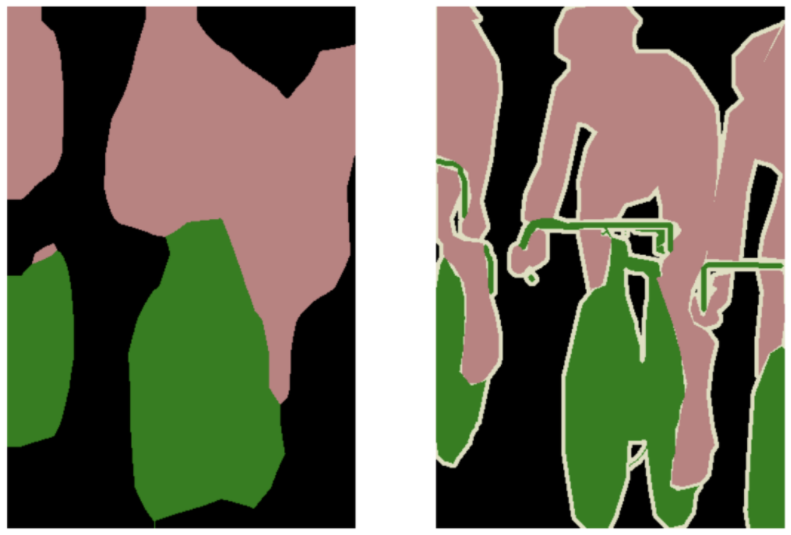</img>
<div align="center">Fig 2. Expected result is fine-grained and dense, while output is coarse.</div>

### Contributions

1. Deal with arbitrary input size (Alternative of patchwise training)
2. Enhanced segmentation by exploiting both high and low-dimensional features
3. Supervised pre-training with deep convents

### Architecture
1. Dense FC layer to 1X1 convolution for classification net
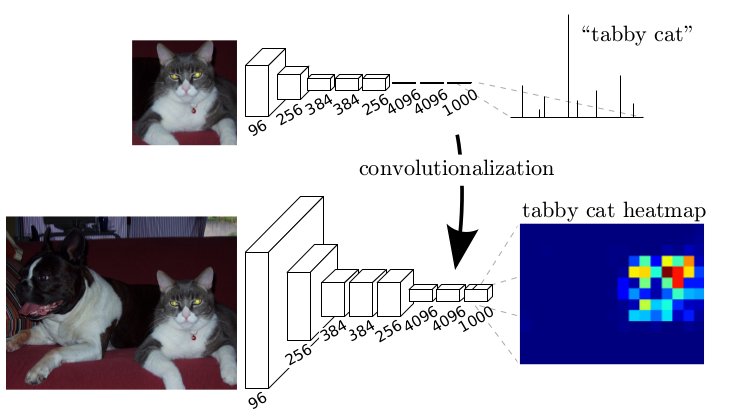</img>
<div align = "center">Fig 3. 1X1 convnet</div>
- Convolution layers are working as FC layers.
- Not only 1X1 convolutions, convolutions can replace arbitrary dimension of FC layers.
- FC layer output is probability distribution, while 1X1 conv layer output is heatmap.
- Heatmap can be interpreted as spatial set of pixel-wise probability distribution.
2. Skip FCNs for upsampling
- Since output heatmap has low resolution, upsampling is required.
- Upsampling & output of downsampling layer are applied together.
- We call it skip FCNs architecture. <br/>
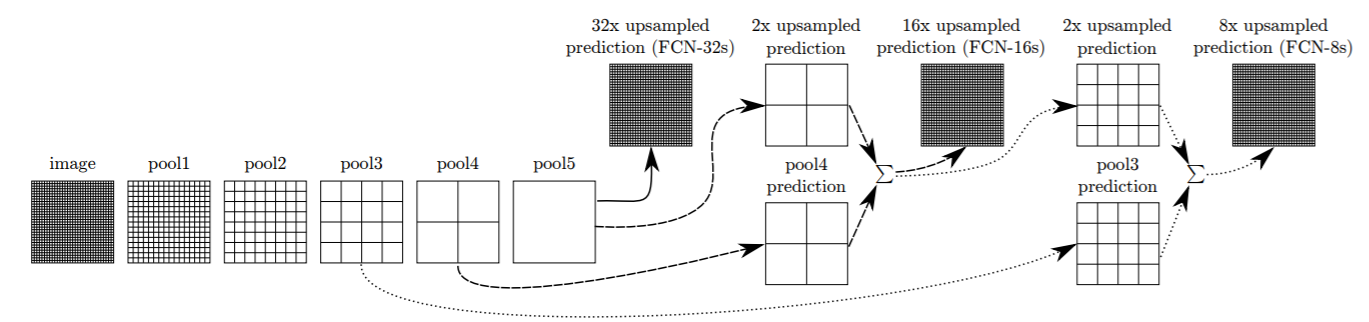</img>
<div align = "center">Fig 4. Skip FCNs</div>

```python
# Pseudocode
FCN-32s = pool5.output()
FCN-16s = Upsample(FCN-32s) + pool4.output()
FCN-8s = Upsample(FCN-16s) + pool3.output()
```
- Summation of upsampled output and previous downsampled output aids dense prediction. <br/>
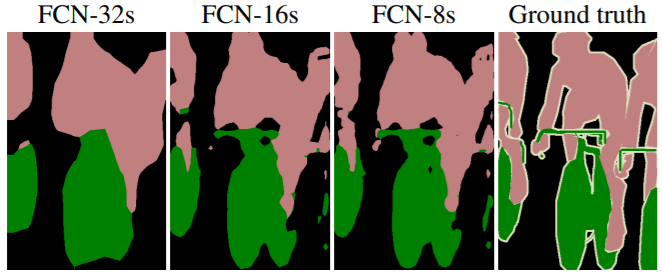</img>
<div align = "center">Fig 5. Skip FCNs output</div>
- Direct summation of downsampled feature maps enhances segmentation performance.
- FCN-8s shows most dense prediction.


### Conceptual Intutitions
1. What is the nature of FCN output?
- Output of FCN with only downsamping layers is classification heatmap. 
- Each pixels of heatmap are equivalent to patch-wise classification result, which patch size is equivalent to recpetive field of ConvNet.
- Thus, FCN can be used as pre-trained feature extractor.
2. How upsampling is possible?
- Conceputally, upsampling is deconvolving corase representations into fine-grained representations.
- Generally, backward convolution(deconvolution) techniques are applied when upsampling, including interpolations.
- [OverFeat](https://arxiv.org/abs/1312.6229) gave a hint about obtaining dense predictions without interpolations
3. What does patchwise training of FCN mean?
- Patchwise training means 'loss sampling', just like stochastic optimization.
- By using ConvNet, created patches(same size with receptive field) significantly overlap, enables efficient computation.
- Sampling in patchwise training can also correct class imbalance problem.